In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv (r'train_ctrUa4K.csv')

In [3]:
df.shape

(614, 13)

In [4]:
df['Loan_ID'].count()

614

Check first 5 Rows

In [5]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Check last 5 Rows

In [6]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Describe Data

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Check coulmns data types

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Check Null values in Loan_ID

In [9]:
df.Loan_ID.isnull().sum()

0

Check Null values in Gender

In [10]:
df.Gender.isnull().sum()

13

In [11]:
df.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

Fulfill Null values in Gender with the most common value

In [12]:
mode = df['Gender'].mode()
df['Gender'] = df['Gender'].fillna(mode[0])
mode

0    Male
Name: Gender, dtype: object

Check Null values in Married

In [13]:
df.Married.isnull().sum()

3

In [14]:
df.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

Fulfill Null values in Married with the most common value

In [15]:
mode = df['Married'].mode()
df['Married'] = df['Married'].fillna(mode[0])
mode

0    Yes
Name: Married, dtype: object

Check Null values in Dependents

In [16]:
df.Dependents.isnull().sum()

15

In [17]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Fulfill Null values in Married with the most common value

In [18]:
mode = df['Dependents'].mode()
df['Dependents'] = df['Dependents'].fillna(mode[0])
mode

0    0
Name: Dependents, dtype: object

In [19]:
df.Education.isnull().sum(), df.Self_Employed.isnull().sum(), df.Credit_History.isnull().sum(), df.Property_Area.isnull().sum(), df.Loan_Status.isnull().sum()

(0, 32, 50, 0, 0)

In [20]:
df.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Fulfill Null values in Self_Employed with the most common value

In [21]:
mode = df['Self_Employed'].mode()
df['Self_Employed'] = df['Self_Employed'].fillna(mode[0])
mode

0    No
Name: Self_Employed, dtype: object

In [22]:
df.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

Fulfill Null values in Credit_History with the most common value

In [23]:
mode = df['Credit_History'].mode()
df['Credit_History'] = df['Credit_History'].fillna(mode[0])
mode

0    1.0
Name: Credit_History, dtype: float64

Check Null values in Loan Amount, Loan Amount Term and Applicant Income

In [24]:
df.LoanAmount.isnull().sum(), df.Loan_Amount_Term.isnull().sum(), df.ApplicantIncome.isnull().sum()

(22, 14, 0)

Delete Null values in Loan Amount

In [25]:
df = df.dropna(subset=['LoanAmount'])

Fulfill Null values in Loan_Amount_Term with the most common value

In [26]:
mode = df['Loan_Amount_Term'].mode()
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(mode[0])
mode

0    360.0
Name: Loan_Amount_Term, dtype: float64

Check Duplication

In [27]:
df[df.duplicated(['Loan_ID'], keep=False)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Sum ApplicantIncome and CoapplicantIncome in new coulmn

In [28]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [29]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [30]:
df.shape

(592, 14)

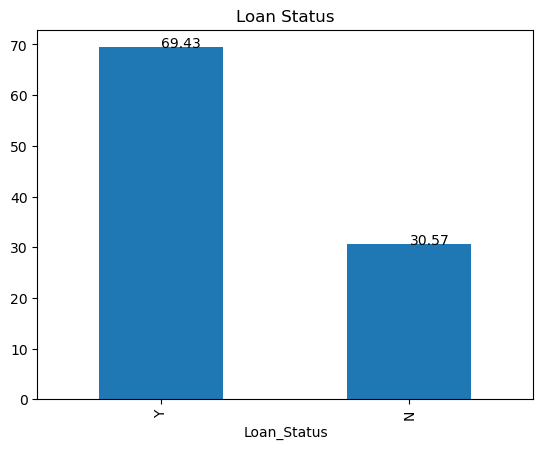

In [31]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

Loan_Approval_Rate = round(df['Loan_Status'].value_counts()/df['Loan_Status'].count()*100, 2)
Loan_Approval_Rate.plot.bar(title = 'Loan Status')
xLabel = ['Approved', 'Rejected']
addlabels(xLabel, Loan_Approval_Rate)

Text(0.5, 1.0, 'Loan Approval Rate')

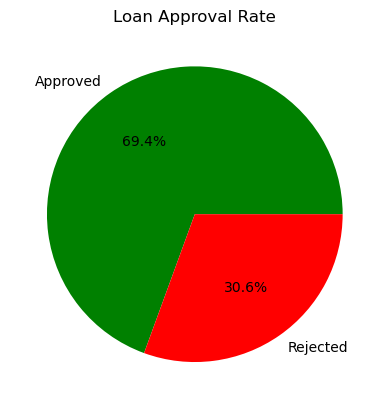

In [32]:
Loan_Approval_Rate = df['Loan_Status'].value_counts()/df['Loan_Status'].count()*100
#Loan_Approval_Rate.plot.bar(title = 'Loan Status')
plt.pie(Loan_Approval_Rate, labels=['Approved', 'Rejected'], colors=['Green', 'Red'],autopct='%1.1f%%')
plt.title('Loan Approval Rate')

<Axes: title={'center': 'Loan Status Numbers'}, xlabel='Loan_Status'>

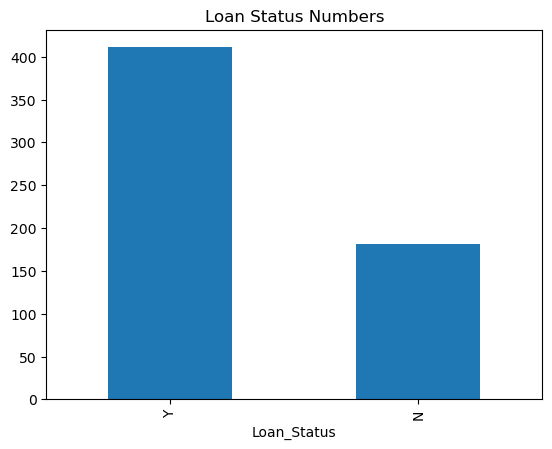

In [33]:
df['Loan_Status'].value_counts().plot.bar(title = 'Loan Status Numbers')

<Axes: title={'center': 'Loan Application based on Gender'}, xlabel='Gender'>

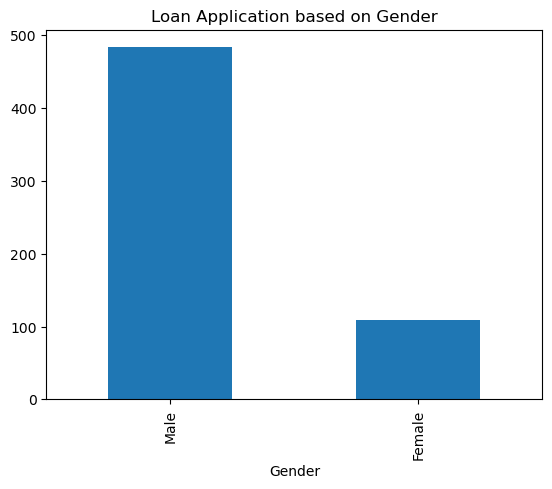

In [34]:
df["Gender"].value_counts().plot.bar(title = 'Loan Application based on Gender')

<Axes: title={'center': 'Loan Application based on Marital Status'}, xlabel='Married'>

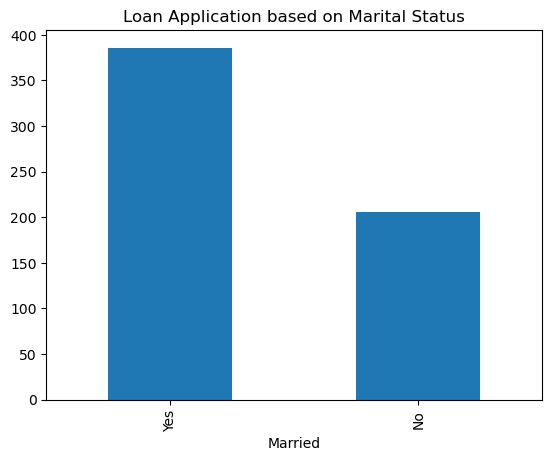

In [35]:
df['Married'].value_counts().plot.bar(title = 'Loan Application based on Marital Status')

<Axes: >

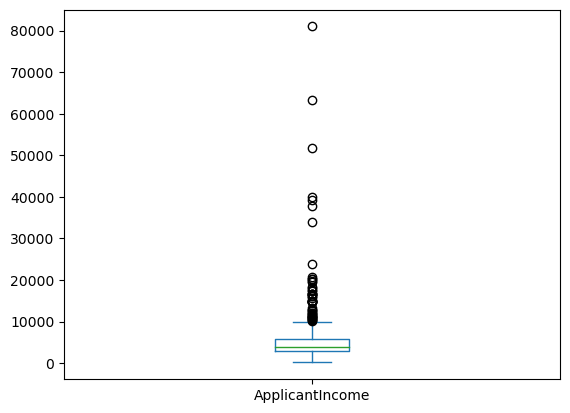

In [36]:
df['ApplicantIncome'].plot.box()

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

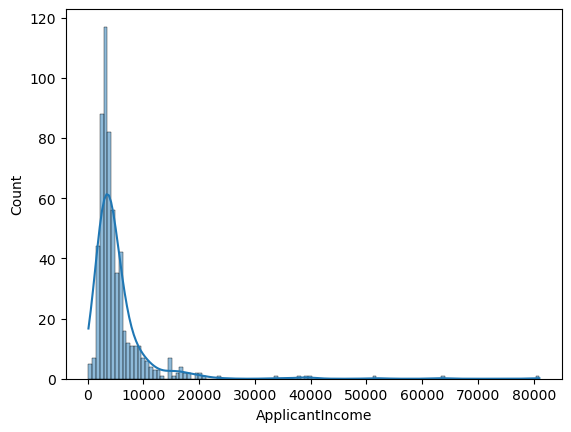

In [37]:
sns.histplot(data = df['ApplicantIncome'], kde = True)

<Axes: >

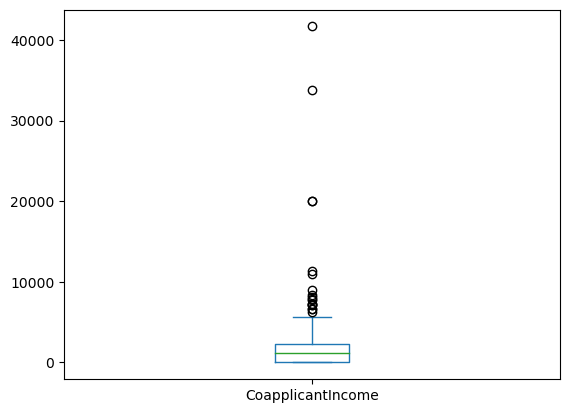

In [38]:
df['CoapplicantIncome'].plot.box()

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

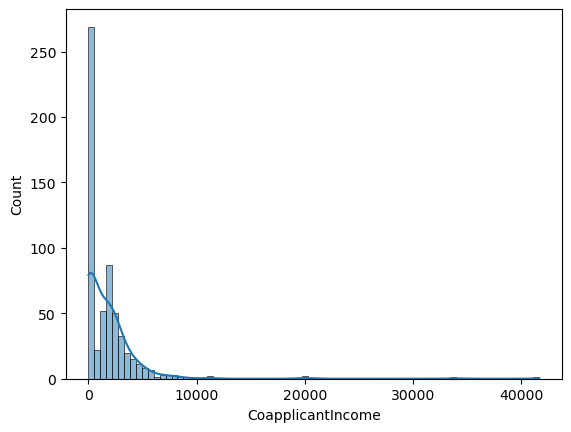

In [39]:
sns.histplot(data = df['CoapplicantIncome'], kde = True)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Gender'>

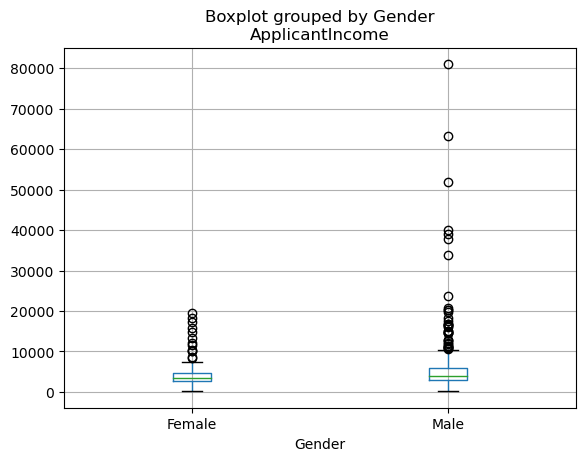

In [40]:
df.boxplot(column='ApplicantIncome',by="Gender" )

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

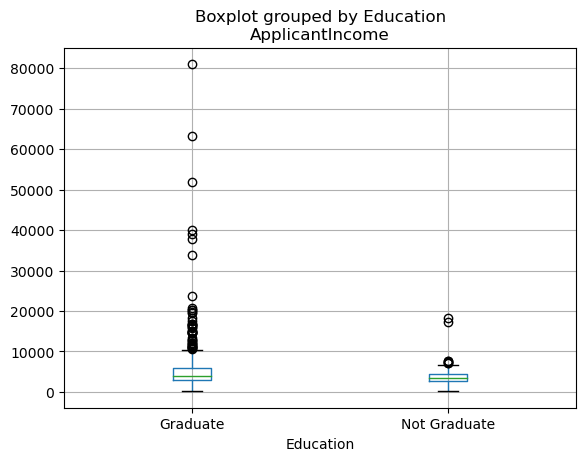

In [41]:
df.boxplot(column='ApplicantIncome',by="Education" )

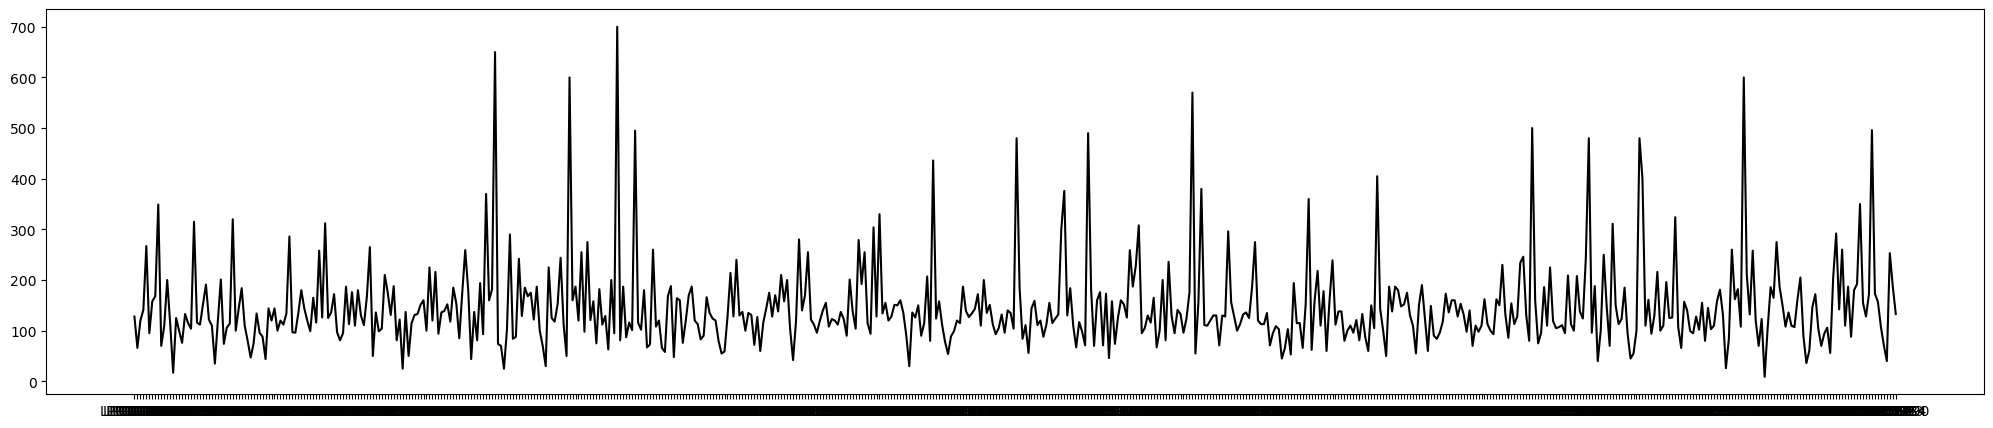

In [42]:
plt.figure(figsize=(25,5))
plt.plot(df['Loan_ID'], df['LoanAmount'], color='k', label='Requested Loan Amount')

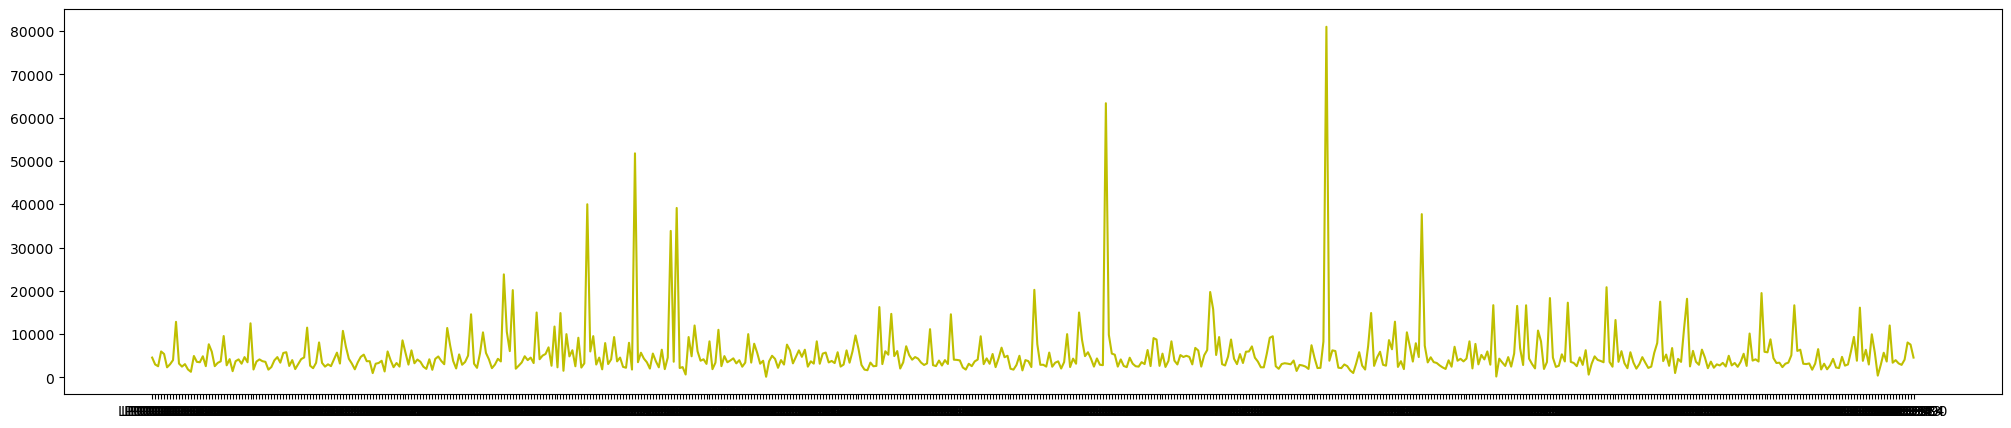

In [43]:
plt.figure(figsize=(25,5))
plt.plot(df['Loan_ID'], df['ApplicantIncome'],color='y', label='Application Income')

<Axes: title={'center': 'Credit History Vs Loan Approval Rate'}, xlabel='Credit_History'>

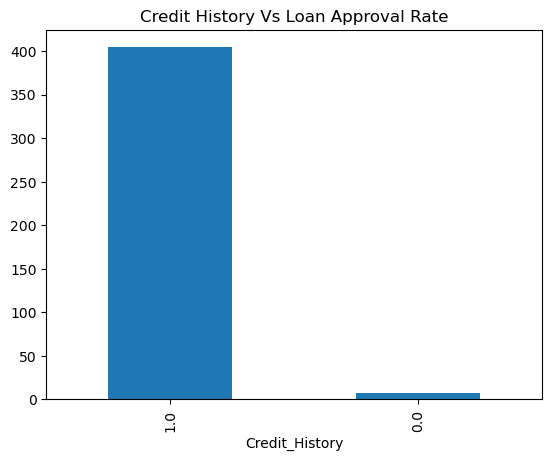

In [44]:
df2 = df.loc[df['Loan_Status'] == 'Y']
df2['Credit_History'].value_counts().plot.bar(title = 'Credit History Vs Loan Approval Rate')

In [45]:
df2['Credit_History'].value_counts()

Credit_History
1.0    404
0.0      7
Name: count, dtype: int64

<Axes: title={'center': 'Loan Application with Good Credit History'}, xlabel='Credit_History'>

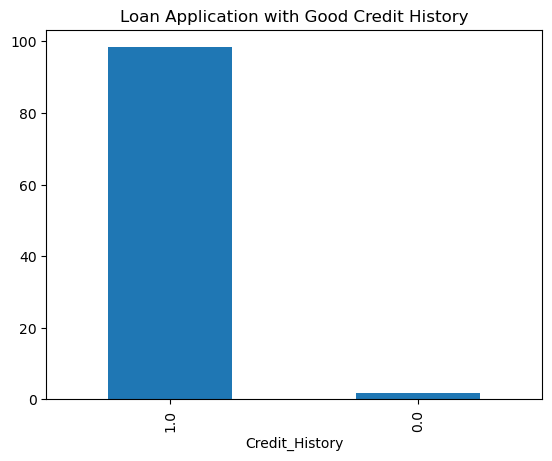

In [46]:
Loan_Good_Credit = round(df2['Credit_History'].value_counts()/df2['Credit_History'].count()*100, 2)
Loan_Good_Credit.plot.bar(title = 'Loan Application with Good Credit History')

In [47]:
df2['Property_Area'].value_counts()

Property_Area
Semiurban    175
Urban        129
Rural        107
Name: count, dtype: int64

<Axes: title={'center': 'Loan Approval Percentage per Area'}, xlabel='Property_Area'>

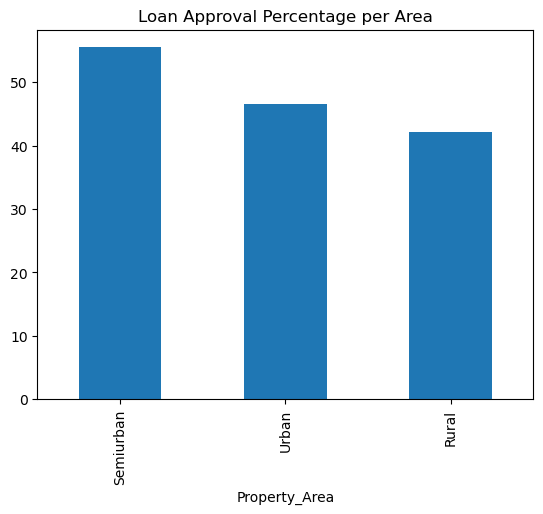

In [48]:
Loan_Approval_Area = round(df['Property_Area'].value_counts()/df2['Property_Area'].count()*100, 2)
Loan_Approval_Area.plot.bar(title = 'Loan Approval Percentage per Area')

In [49]:
df2['Dependents'].value_counts()

Dependents
0     240
2      75
1      63
3+     33
Name: count, dtype: int64

In [50]:
df['Dependents'].value_counts()

Dependents
0     347
1      98
2      98
3+     49
Name: count, dtype: int64

<Axes: title={'center': 'Loan Approval Percentage According to Dependents'}, xlabel='Dependents'>

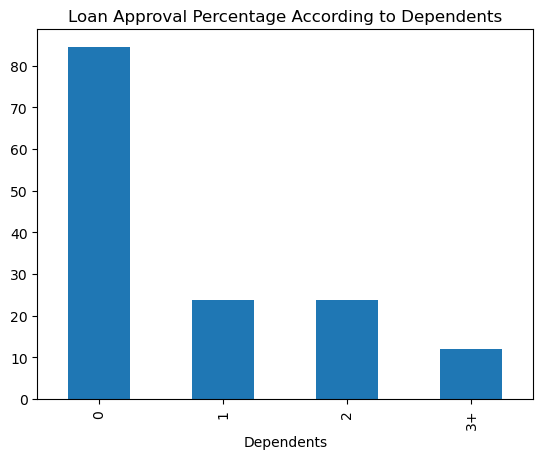

In [51]:
Loan_Approval_Dependents = round(df['Dependents'].value_counts()/df2['Dependents'].count()*100, 2)
Loan_Approval_Dependents.plot.bar(title = 'Loan Approval Percentage According to Dependents')

In [52]:
df['Education'].value_counts()

Education
Graduate        465
Not Graduate    127
Name: count, dtype: int64

<Axes: title={'center': 'Loan Approval Percentage According to Education'}, xlabel='Education'>

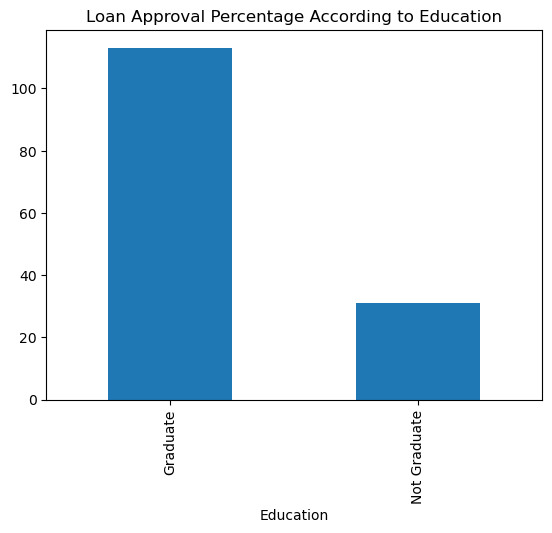

In [53]:
Loan_Approval_Education = round(df['Education'].value_counts()/df2['Education'].count()*100, 2)
Loan_Approval_Education.plot.bar(title = 'Loan Approval Percentage According to Education')

In [54]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    507
180.0     42
480.0     15
300.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<Axes: title={'center': 'Loan Approval Percentage According to Loan Term Amount'}, xlabel='Loan_Amount_Term'>

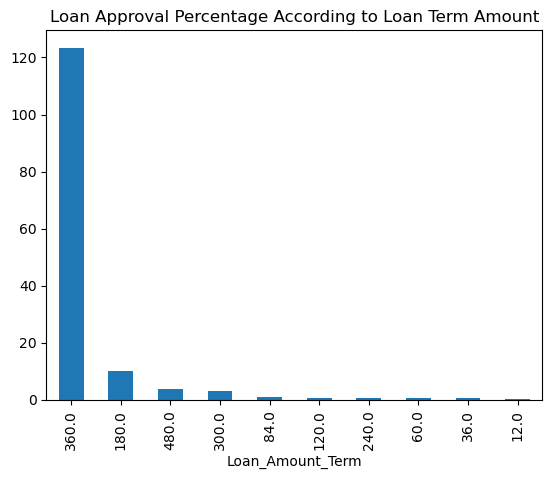

In [55]:
Loan_Approval_Term = round(df['Loan_Amount_Term'].value_counts()/df2['Loan_Amount_Term'].count()*100, 2)
Loan_Approval_Term.plot.bar(title = 'Loan Approval Percentage According to Loan Term Amount')

<Axes: title={'center': 'LoanAmount'}, xlabel='Property_Area'>

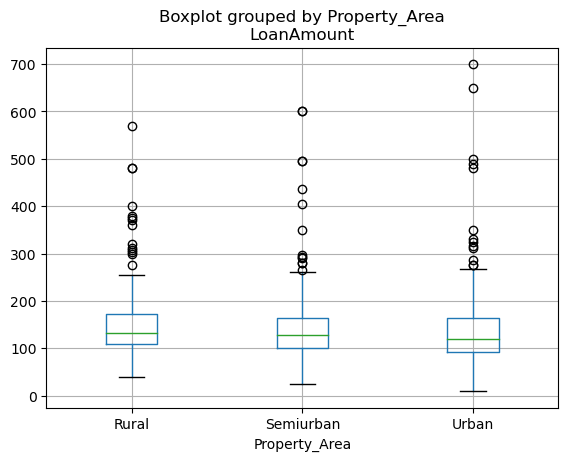

In [56]:
df.boxplot(column='LoanAmount',by="Property_Area" )